<a href="https://colab.research.google.com/github/brunoegs/DiploDatos-2021/blob/main/exploracion-y-curacion/entregables/entregable-parte-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy 
import datetime
import seaborn
seaborn.set_context('talk')
import missingno as msno

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
# To update plotly, uncomment and run the following line:
#!pip install plotly --upgrade

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


## Analisis Dataset

Vemos las variables que tiene el dataset, sus valores nulos y sus tipos.

In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Observamos que la variable fecha es de tipo object, tambien vemos que las variables numéricas BuildingArea, YearBuilt tienen aproximadamente la mitad de sus valores Nan

In [ ]:
# La variable fecha se encuentra en formato Object, la transformamos a datetime
melb_df['date'] = pd.to_datetime(melb_df.Date)


## Analisis de Correlación para Variables Continuas
Como primera aproximación al dataset, realizamos un análisis de correlación de las variables continuas con la variable Precio.

In [ ]:
corr_matrix=melb_df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

Notamos que la variable precio tiene mayor correlación con variables relacionadas al tamaño de la propiedad (Rooms,Bedroom2, Bathroom, Car, BuildingArea, Landsize) en menor medida con la ubicación de la propiedad (Longitude,Lattitude,Distance) y correlación negativa con el Año de Construcción.

## Análisis Variables continuas, distribuciones y valores extremos

In [ ]:
# Funciones para eliminar valores extremos
def clean_outliers_q3(dataset, column_name,q=.75):
    interesting_col = dataset[column_name]   
    mask_outlier = (interesting_col <= ( 2.5 * interesting_col.quantile(q)))
    return dataset[mask_outlier]
def clean_outliers_quant(dataset, column_name,quant):
    interesting_col = dataset[column_name]   
    mask_outlier = (interesting_col <=  interesting_col.quantile(quant))
    return dataset[mask_outlier]


### Distribución de la variable Price

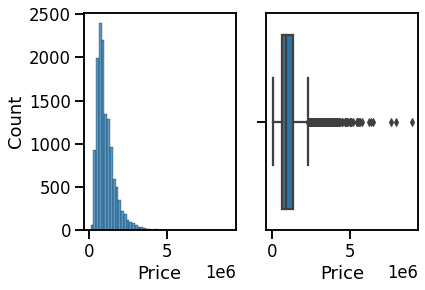

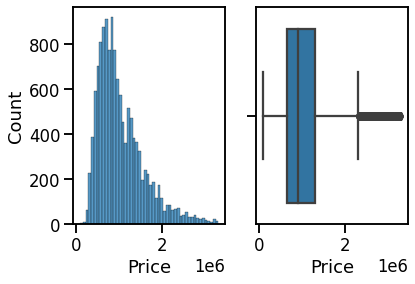

In [ ]:
#distribución de la variable original
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df['Price'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df['Price'], ax= axes[1])

melb_df1=clean_outliers_q3(melb_df, 'Price')

#distribución de la variable luego de la eliminación de valores extremos
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df1['Price'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df1['Price'], ax= axes[1]) 

### Distribución de la variable Car

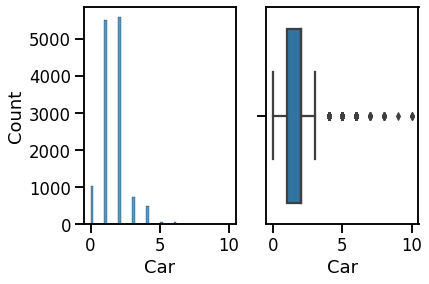

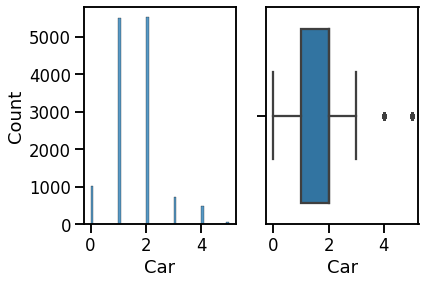

In [ ]:
#distribución de la variable original
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df['Car'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df['Car'], ax= axes[1])

melb_df1=clean_outliers_q3(melb_df1, 'Car')

#distribución de la variable luego de la eliminación de valores extremos
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df1['Car'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df1['Car'], ax= axes[1])

### Distribución de Variable Bathroom

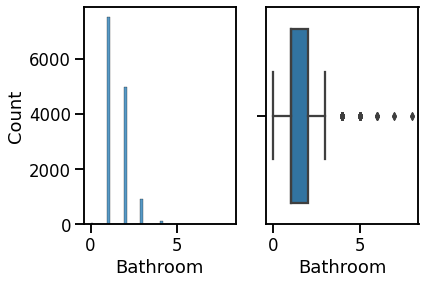

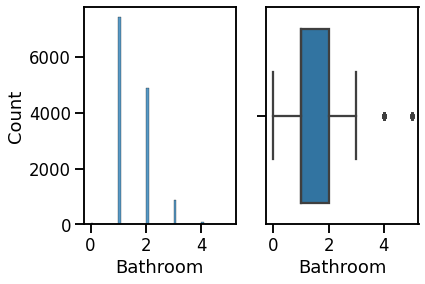

In [ ]:
#distribución de la variable original
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df['Bathroom'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df['Bathroom'], ax= axes[1])

melb_df1=clean_outliers_q3(melb_df1, 'Bathroom')

#distribución de la variable luego de la eliminación de valores extremos
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df1['Bathroom'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= melb_df1['Bathroom'], ax= axes[1])

In [ ]:
len(melb_df1[melb_df1.Bathroom == 0])

34

En la variable bathroom aparecen 34 propiedades que poseen 0 baños, si bien este valor parece poco probable , consideramos que la cantidad de registros es relativamente baja y que en principio no afectaría demasiado a la estimación de precios.


### Distribución variable Rooms

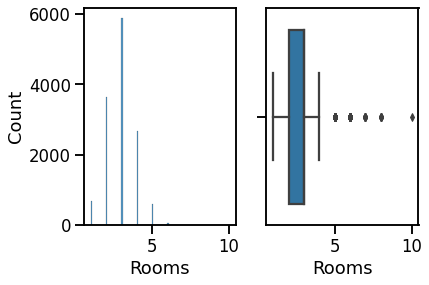

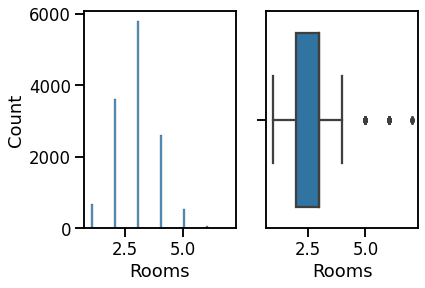

In [ ]:
#distribución de la variable original
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df['Rooms'], ax= axes[0])
g = seaborn.boxplot(x= melb_df['Rooms'], ax= axes[1])

melb_df1=clean_outliers_q3(melb_df1, 'Rooms')

#distribución de la variable luego de la eliminación de valores extremos
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df1['Rooms'], ax= axes[0])
g = seaborn.boxplot(x= melb_df1['Rooms'], ax= axes[1])

### Distribución variable Bedroom2

Con respecto a la variable Bedroom2 , nos preguntamos si agrega información adicional sobre Rooms, o si esta variable genera ruido.

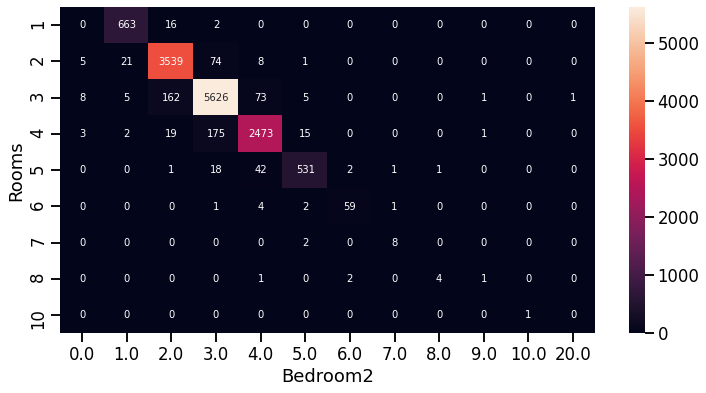

In [ ]:
fig = plt.figure(figsize=(12,6))
Bedroom2 = melb_df.Bedroom2
Rooms = melb_df.Rooms
exp= pd.crosstab(Rooms,Bedroom2)
seaborn.heatmap(exp, annot=True, fmt='g')

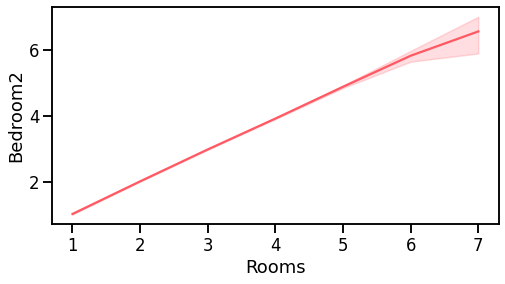

In [ ]:
plt.figure(figsize=(8, 4))
seaborn.lineplot(data=melb_df1, y='Bedroom2', x='Rooms', color= '#FF5964')

La columna Bedroom2 no fue seleccionada debido a que es una variable tomada de otro dataset, y no aporta imformación tan certera como asi lo hace la columna Rooms.

### Distribucion variable Distance

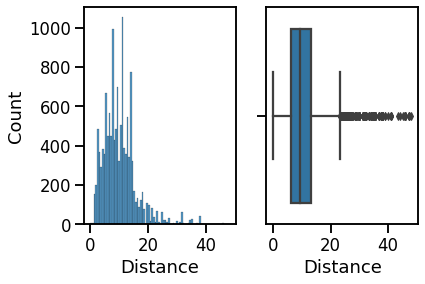

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df1['Distance'], ax= axes[0])
g = seaborn.boxplot(x= melb_df1['Distance'], ax= axes[1])


### Distribucion variable Landsize

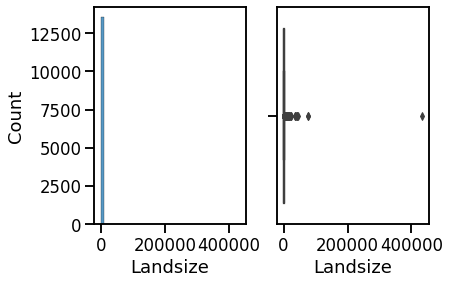

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(6,4))
g = seaborn.histplot(x= melb_df['Landsize'],bins=50, ax= axes[0])
g = seaborn.boxplot(x= melb_df['Landsize'], ax= axes[1])

#melb_df1=clean_outliers_quant(melb_df1, 'Landsize',.99)

# fig, axes = plt.subplots(ncols=2, figsize=(6,4))
# g = seaborn.histplot(x= melb_df1['Landsize'], ax= axes[0])
# g = seaborn.boxplot(x= melb_df1['Landsize'], ax= axes[1])

Landsize: Como se puede observar, esta variable posee un gran número de registros con valores iguales a cero, si bien la mayoría de esos registros corresponden a departamentos, lo que sería lógico que tengan ese valor, consideramos que puede afectar nuestro análisis y por ese motivo se descarta. 

###Borramos valores extremos

Se determinó eliminar los valores extremos de las variables Price, Bathroom, Car y Rooms, ya que se observo mediante las distrubuciones representadas que dichas variables presentan valores extremos, por lo que, se eliminan auqellos registros donde dichas variables superan en 2.5 veces el tercer cuartil, ya que estos valores son considerados valores extremos, y dichos ejemplos no son considerados relevantes para la población que se quiere evaluar. De acuerdo a este criterio fueron eliminados solo 285 valores, aproximadamente un 2% del dataset.

In [ ]:
melb_df1.describe().round()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13298.0,13298.0,13298.0,13298.0,13298.0,13298.0,13298.0,13298.0,6968.0,8034.0,13298.0,13298.0,13298.0
mean,3.0,1041208.0,10.0,3105.0,3.0,2.0,2.0,554.0,150.0,1965.0,-38.0,145.0,7450.0
std,1.0,551008.0,6.0,90.0,1.0,1.0,1.0,4031.0,547.0,37.0,0.0,0.0,4384.0
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,144.0,249.0
25%,2.0,645000.0,6.0,3044.0,2.0,1.0,1.0,174.0,92.0,1943.0,-38.0,145.0,4380.0
50%,3.0,900000.0,9.0,3084.0,3.0,1.0,2.0,431.0,125.0,1970.0,-38.0,145.0,6543.0
75%,3.0,1310000.0,13.0,3148.0,3.0,2.0,2.0,650.0,170.0,1999.0,-38.0,145.0,10331.0
max,7.0,3325000.0,48.0,3977.0,20.0,5.0,5.0,433014.0,44515.0,2018.0,-37.0,146.0,21650.0


## Analisis de datos faltantes

In [ ]:
# Vemos las variables con valores Nan
cols1= melb_df1.isna().sum()
cols1 [cols1 > 0]

BuildingArea    6330
YearBuilt       5264
CouncilArea     1281
dtype: int64

In [ ]:
# Observamos las variables con valores ceros
cols = melb_df1[melb_df1 == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1023
Landsize        1936
BuildingArea      16
dtype: int64

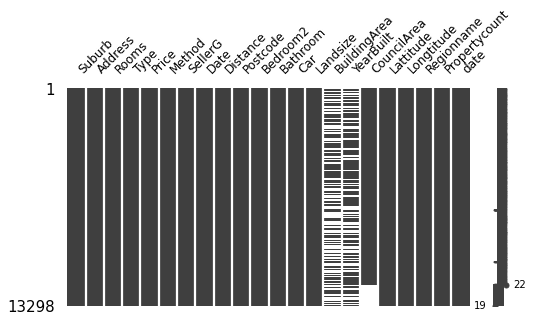

In [ ]:
#Cantidad de Valores NaN en dataframe
msno.matrix(melb_df1,figsize=(8, 4), fontsize=12)

En la matriz de valores faltantes se observa correlacion entre los valores faltantes de BuildingArea y Yearbuilt, probablemente correspondan a vendedores que no registraron estos valores.


BuildingArea: por la cantidad de datos faltantes y por considerar que la información contenida en esta variable puede estar representadas por otras variables sin datos faltantes y relacionadas a tamaño de la propiedad, creemos que imputar la cantidad de faltantes introduciría un sesgo mayor que desechar la variable.

YearBuilt: si bien la variable tiene  correlación  con el precio y es una variable que consideramos relevante para determinarlo , probablemente imputar esta variable con la cantidad de datos faltantes que posee introduciría un sesgo mayor que eliminarla.

En ambos casos el metodo correcto para determinar si conservar estas variables o eliminarlas implicaria evaluar las predicciones de precio, sin las variables y con las variables imputadas, para ver que modelo genera 'mejores' predicciones.

En principio eliminamos estas variables ya que creemos que el sesgo por imputar tantos datos faltantes sería mas perjudicial que eliminar estas variables.

CouncilArea: es una variable categórica relacionada a la ubicación, esta variable puede imputarse a partir de suburb o de información geografica externa.

## Variables relacionadas a la ubicación

Variables a analizar = ['Suburb', 'Address', 'Postcode', 'CouncilArea',            'Regionname', 'Distance', 'Propertycount', 'Lattitude','Longtitude']

Dado que nuestro dataframe tiene coordenadas geográficas, creemos que sería interesante ver como se distribuyen los precios de acuerdo a la ubicación viendo esta infomación en un mapa

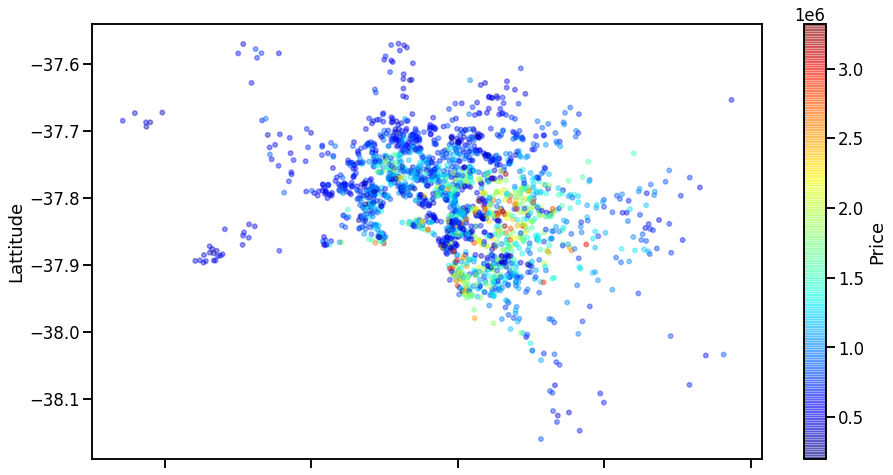

In [ ]:
#price_median = melb_df1.Price.median()
#price_q25= melb_df1.quantile(.25)
#price_q75=melb_df1.quantile(.75)
#price_low_median =  melb_df1[(melb_df1['Price']<price_median)&(melb_df1['Price']>price_q25)].sample(1500)
#price_high_median = (melb_df1[(melb_df1.Price>price_median)&(melb_df1.Price<price_q75)]).sample(1500)
#melb_price_eq = pd.concat(price_low_median,price_high_median)
melb_df1.sample(2000).plot(           
                   kind='scatter',
                    x='Longtitude',
                    y='Lattitude',
                    alpha=0.4,
                    #s=df3_sample['Regionname'],
                    c='Price',
                    cmap=plt.get_cmap('jet'),
                    colorbar=True,
                    figsize=(15,8))

En el mapa podemos observar que existe cierta relación entre precios y ubicación, las propiedades ubicadas mas en el centro parecen tener valores mas altos que las de la periferia.

Dentro de las variables de nuestro dataframe relacionadas a ubicación, las variables categóricas Suburb y Postcode, son las que estan mas 'desagregadas' en relación a CouncilArea, Regionname; y podrían contener mejor la variación de precios en relación a ubicación.

Al ser estas variables categóricas, decidimos agruparlas y agregarlas por promedios, para ver sus correlaciones con precios.

In [ ]:
# Creamos un df con una columna que agrege la info de precios promedios por suburbios para visualizar distribuciones en mapa
pricesuburb = melb_df1.groupby('Suburb').Price.mean().reset_index().rename(columns={'index': 'Suburb', 'Price': 'Suburb_Price_mean'})
price_suburb=pd.DataFrame(pricesuburb)

In [ ]:
# Df que agrega los precios promedios por Postcode
pricepostcode = melb_df1.groupby('Postcode').Price.mean().reset_index().rename(columns={'index': 'Postcode', 'Price': 'Postcode_Price_mean'})
price_postcode=pd.DataFrame(pricepostcode)

In [ ]:
dfmelb_3 = melb_df1.copy()
dfmelb_3 = dfmelb_3.merge(price_suburb, on='Suburb')
dfmelb_3 = dfmelb_3.merge(price_postcode, on='Postcode')

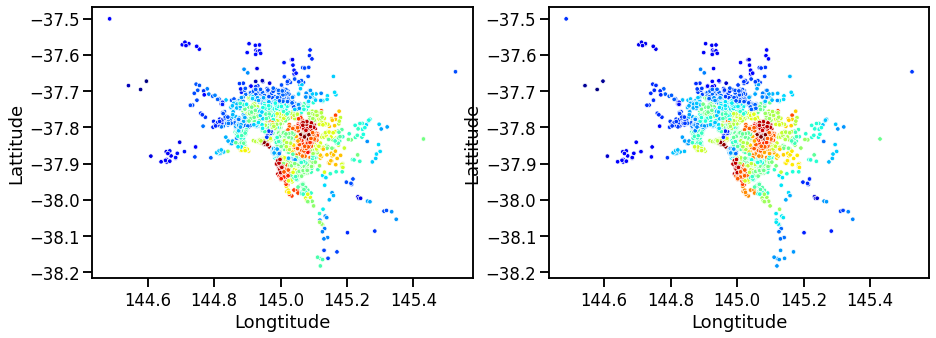

In [ ]:
# Precios promedios por Suburb y Postcode
color_col1 = 'Suburb_Price_mean'
color_col2 = 'Postcode_Price_mean'
data = dfmelb_3.sample(2000)
fig, axes = plt.subplots(ncols=2, figsize=(15,5))
seaborn.scatterplot( data=data,                  
                    y=data.Lattitude,
                    x=data.Longtitude,                    
                   marker='.',
                   ax=axes[0],                                      
                   c=data[color_col1],
                   cmap=plt.get_cmap('jet'))
seaborn.scatterplot( data=data,                  
                    y=data.Lattitude,
                    x=data.Longtitude,                    
                   marker='.',
                   ax=axes[1],                                      
                   c=data[color_col2],
                   cmap=plt.get_cmap('jet'))

En los gráficos podemos ver como los precios promedios, agregados por suburb y por postcode, son mayores en tres zonas centrales y disminuyen hacia la periferia. 

Veamos la correlación de Suburb y Postcode agregadas por precios promedios, y las variables Distance , PropertyCount.

In [ ]:
dfmelb_3[['Price','Suburb_Price_mean','Postcode_Price_mean','Distance','Propertycount']].corr()

,Price,Suburb_Price_mean,Postcode_Price_mean,Distance,Propertycount
Price,1.000000,0.581853,0.566161,-0.156767,-0.050727
Suburb_Price_mean,0.581853,1.000000,0.973032,-0.262071,-0.087182
Postcode_Price_mean,0.566161,0.973032,1.000000,-0.265777,-0.095208
Distance,-0.156767,-0.262071,-0.265777,1.000000,-0.056992
Propertycount,-0.050727,-0.087182,-0.095208,-0.056992,1.000000


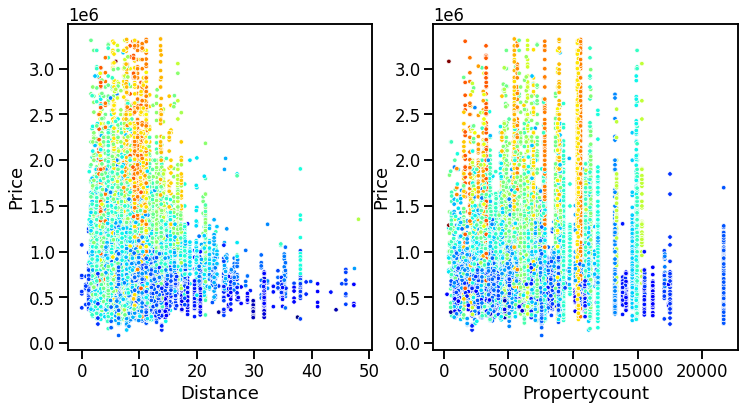

In [ ]:
data = dfmelb_3.sample(13000)
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
seaborn.scatterplot( data=data,                  
                   x=data.Distance,
                   y=data.Price,                    
                   marker='.',
                   ax=axes[0],                                      
                   c=data[color_col1],
                   cmap=plt.get_cmap('jet'))
seaborn.scatterplot( data=data,                  
                    x=data.Propertycount,
                    y=data.Price,                    
                   marker='.',
                   ax=axes[1],                                      
                   c=data[color_col1],
                   cmap=plt.get_cmap('jet'))

In [ ]:
#melb_df1

Observando los valores de correlaciones y viendo los scatterplots, decidimos:

* La columna Address no fue seleccionada, ya que no suma información adicional al resto de las columnas que hacen referencia a la localización de vivienda. 
* CouncilArea, RegionName: estas variables estan más agregadas que las variables Suburb, Zipcode, consideramos que si bien pueden ser utiles desde el punto de vista geográfico , las variables Suburb y Postcode contienen mejor a la variación de precios por ubicación y decidimos prescindir de CouncilArea y RegionName.
* Distance: tiene correlación con precios y con precios por Suburb, la conservamos.
* PropertyCount: representa la cantidad de propiedades por Suburb, su correlación con Price es cercana a cero, decidimos eliminarla.

## Distribución de otras variables en relacion al precio

Variables a analizar= ['Price', 'SellerG', 'Method', 'date', 'type']

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

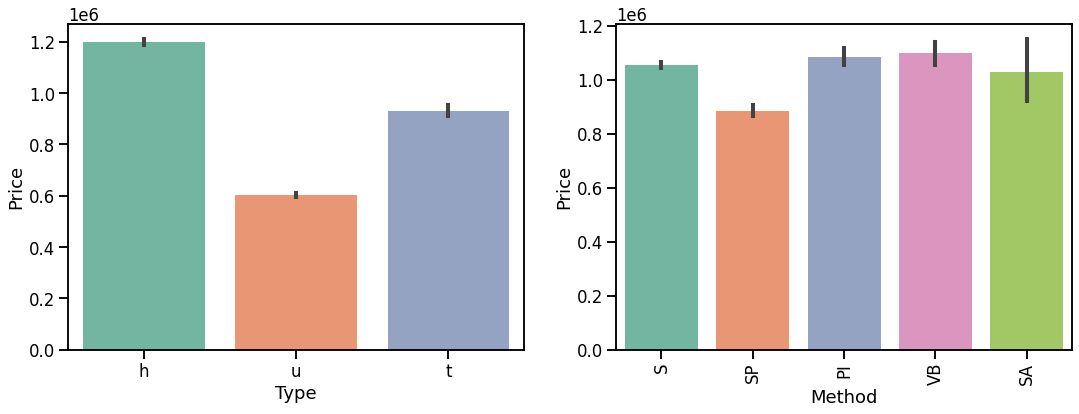

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
g = seaborn.barplot(data=melb_df1, x='Type', y='Price', palette= 'Set2', ax= axes[0])
g = seaborn.barplot(data=melb_df1, x='Method', y='Price', palette= 'Set2', ax= axes[1])

plt.xticks(rotation=90)

Type: A partir del gráfico se puede observar que existe una clara relación entre el precio y el tipo de vivienda, ya que existe una gran diferencia en el precio promedio correspodiente a cada tipo de vivienda.

Method: A diferencia de la variable Type, con la variable Method no existiría una diferencia significativa en el precio de las viviendas de acuerdo al método con el que fué vendida, si bien se observa que con el método SP (venta anticipada), serían viviendas menor valuadas, que con respecto al resto de los métodos, esta información no la consideramos relevante para el análisis por lo que esta variable es descartada.

### Variable date

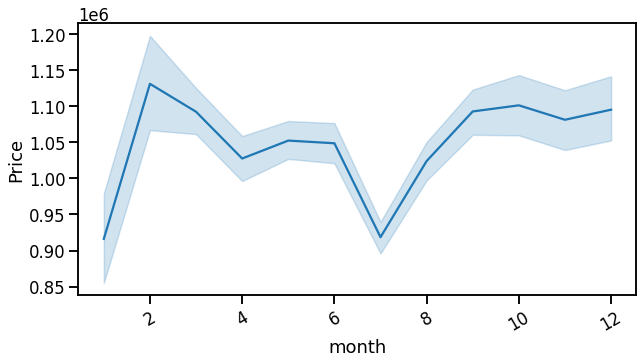

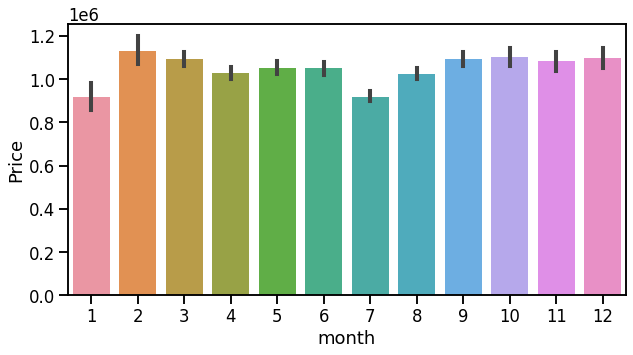

In [ ]:
## Analisis de variable Date

melb_df1['new_date'] = pd.to_datetime(melb_df1.date.dt.strftime('%d-%m-%Y'))
melb_df1.new_date.sort_values()

# no needed
agg_method = {'Price': ('mean', 'count')}
bydate_df = melb_df1.groupby('new_date').agg(agg_method).round()
bydate_df['Dates'] = bydate_df.index

# Convirtiendo fechas a cuatrimestres y meses
melb_df1['quarters'] = melb_df1['date'].dt.quarter
melb_df1['month'] = melb_df1['date'].dt.month



fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df1.sort_values('month'), x='month', y='Price')
plt.xticks(rotation=30);
melb_df1['quarters'].unique()

fig = plt.figure(figsize=(10, 5))
seaborn.barplot(data=melb_df1, x='month', y='Price')


Al analizar la variable date pudimos observar que hay una variación a lo largo de los meses con respecto al precios de las viviendas, por lo que hay una dependencia entre la fecha y el precio de la vivienda, ya que estas parecerían ir disminuyendo su valor hasta llegar a un valor mínimo a julio, donde comienzan a volver a aumentar, volviendo a disminuir en enero, por dicha relacion es una variable que se decide conservar.

### Variable SellerG


Pensamos que la variable sellerG esta relacionada a la ubicación donde operan los vendedores, para comprobarlo analizamos los diez vendedores con mayor cantidad de registros, sus ubicaciones y los promedios de precios de cada uno.

In [ ]:
# Selecionamos los 10 vendedores con mas registros
Seller_freq = melb_df1['SellerG'].value_counts().head(10).reset_index().rename(columns={'index':'Seller'})

In [ ]:
Seller_list = list(Seller_freq.Seller)

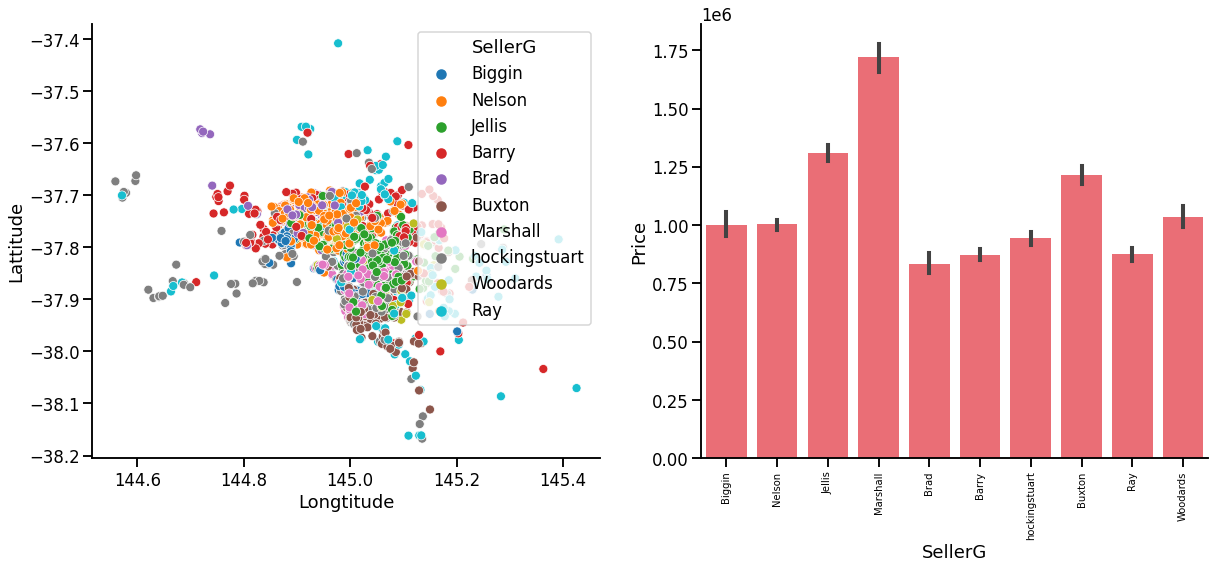

In [ ]:
# Graficamos la ubicacion de las transacciones que realizan vendedores y el precio promedio por vendedor.
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
data=melb_df1[melb_df1.SellerG.isin(Seller_list)]

seaborn.scatterplot(data=data.sample(2000) , y=data.Lattitude, x=data.Longtitude, color= '#FF5964',hue='SellerG',ax=axes[0])

seaborn.barplot(data=data , y=data.Price, x=data.SellerG, color= '#FF5964',hue_order=Seller_list,ax=axes[1])
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
seaborn.despine()

In [ ]:
# Precios agrupados por vendedores
priceseller = melb_df1.groupby('SellerG').Price.mean().reset_index().rename(columns={'index': 'Seller', 'Price': 'Seller_price'})
price_seller=pd.DataFrame(priceseller)
dfmelb_3=dfmelb_3.merge(price_seller, on='SellerG')

In [ ]:
# Analisis de Correlacion entre precios promedios de vendedores y precios promedios de Suburb
dfmelb_3[['Suburb_Price_mean','Seller_price']].corr()

,Suburb_Price_mean,Seller_price
Suburb_Price_mean,1.00000,0.54522
Seller_price,0.54522,1.00000


Como podemos observar en los gráficos y en el análisis de correlación, se puede observar que los vendedores estan agrupados en áreas, y los promedios de los precios de las propiedadas que venden estan relacionados al suburbio en que se desempeñan. Por lo tanto consideramos que esta variable no agrega información adicional respecto al precio de las propiedades y la eliminamos.

## Conclusión, variables seleccionadas, justificación de las variables que eliminamos,  y dataframe final


Para ejecutar el análisis se seleccionaron las columnas: Suburb, Rooms,	Type,	Price,	Date,	Distance,	Postcode,	Bathroom,	Car, Lattitude,	Longtitude.	

Las columnas que no fueron seleccionadas para efectuar el análisis fueron:

*   La columna Address no fué seleccionada, ya que no suma información adicional al resto de las columnas que hacen referencia a la localización de vivienda. 
*   La columna Method no fué seleccionada, ya que no existe una correlación entre el precio y la variable.
*   La columna SellerG no fué seleccionada, ya que no existe una correlación entre el precio y la variable.
*   La columna Bedroom2 no fué seleccionada debido a que es una variable tomada de otro dataset, y no aporta imformación tan certera como asi lo hace la columna Rooms.
*   Por otra parte las columnas Building Area y YearBuilt, tampoco fueron seleccionadas debido a que poseen muchos datos faltantes, y si bien ambas variables serían relevantes para el análisis, imputar esa cantidad de datos (6330 para BuildingArea, 5264 para YearBuilt) introduciría un sesgo en la muestra. 
*   La columna Landsize no fué seleccionada ya que debido a su gran número de registros que toman el valor de cero, lo que consideramos que podría interferir en nuestro análisis.
*   Las columna CouncilArea y Regionname no fueron seleccionadas ya que de aquellas variables que hacen referencia a la ubicación de la vivienda se escogieron aquellas que estivieran mas desagregadas, como Suburb y Zipcode.
*   La columna Propertycount no fue seleccionada ya que no existe una correlación entre el precio y la variable.

In [ ]:
# Dataframe luego de seleccion de variables
filtered_df= melb_df1[['Suburb', 'Rooms', 'Type', 'Price', 'date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'BuildingArea',	'YearBuilt', 'Lattitude', 'Longtitude']]

In [ ]:
melb_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13579
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13298 non-null  object        
 1   Address        13298 non-null  object        
 2   Rooms          13298 non-null  int64         
 3   Type           13298 non-null  object        
 4   Price          13298 non-null  float64       
 5   Method         13298 non-null  object        
 6   SellerG        13298 non-null  object        
 7   Date           13298 non-null  object        
 8   Distance       13298 non-null  float64       
 9   Postcode       13298 non-null  float64       
 10  Bedroom2       13298 non-null  float64       
 11  Bathroom       13298 non-null  float64       
 12  Car            13298 non-null  float64       
 13  Landsize       13298 non-null  float64       
 14  BuildingArea   6968 non-null   float64       
 15  YearBuilt      8034

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Suburb        13298 non-null  object        
 1   Rooms         13298 non-null  int64         
 2   Type          13298 non-null  object        
 3   Price         13298 non-null  float64       
 4   date          13298 non-null  datetime64[ns]
 5   Distance      13298 non-null  float64       
 6   Postcode      13298 non-null  float64       
 7   Bathroom      13298 non-null  float64       
 8   Car           13298 non-null  float64       
 9   BuildingArea  6968 non-null   float64       
 10  YearBuilt     8034 non-null   float64       
 11  Lattitude     13298 non-null  float64       
 12  Longtitude    13298 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.0+ MB


## Combinacion de Categorias

In [ ]:
filtered_df['Suburb'].value_counts() 

Reservoir         352
Richmond          257
Bentleigh East    248
Preston           238
Brunswick         219
                 ... 
Whittlesea          1
Riddells Creek      1
Brookfield          1
New Gisborne        1
Plumpton            1
Name: Suburb, Length: 314, dtype: int64

Como se puede observar hay muchas categorías en esta variable que toman muy pocos valores, por lo que dichos registros se las agrupó en otra categoría denominada other_suburbs

In [ ]:
# Tomando las primeras 230 categorías más frecuentes de Suburb, ya tengo representado el 98% del dataset.
# Es decir en el 90% de los registros del df original aparece alguna de estas categorías.
(filtered_df['Suburb'].value_counts().cumsum()/len(filtered_df)).head(230)

Reservoir         0.026470
Richmond          0.045796
Bentleigh East    0.064446
Preston           0.082343
Brunswick         0.098812
                    ...   
Melton West       0.977365
Huntingdale       0.977891
Taylors Hill      0.978418
Doveton           0.978944
Aspendale         0.979471
Name: Suburb, Length: 230, dtype: float64

In [ ]:
def crear_dict_categ_nueva(pd_serie_con_categorias, quantile, new_category):
    quantil = pd_serie_con_categorias.value_counts().cumsum()/len(pd_serie_con_categorias)
    categories = np.where(quantil<=quantile, quantil.index, new_category)
    categories = pd.Series(categories, index=quantil.index)
    categories_dict = categories.to_dict()
    return categories_dict

In [ ]:
Suburb_nuevas_categorias= crear_dict_categ_nueva(filtered_df['Suburb'], quantile=0.98, new_category='Other_Suburbs')

In [ ]:
filtered_df1= filtered_df.copy()

In [ ]:
filtered_df1['Suburb'] = filtered_df['Suburb'].map(Suburb_nuevas_categorias)

In [ ]:
filtered_df1['Suburb'].value_counts() 

Reservoir         352
Other_Suburbs     266
Richmond          257
Bentleigh East    248
Preston           238
                 ... 
Scoresby            7
Huntingdale         7
Doveton             7
Aspendale           7
Taylors Hill        7
Name: Suburb, Length: 232, dtype: int64

## Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico

  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

####Punto 1

Importamos el dataset de Airbnb

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = ['suburb', 'zipcode','city',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude']   # 'description', 'neighborhood_overview', street', 'neighborhood',  'state'
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:3]

,city,suburb,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,Manningham,Bulleen,3105,-37.772684,145.092133,60,NaN,NaN
1,Moreland,Brunswick East,3057,-37.766505,144.980736,35,200.0,803.0
2,Port Phillip,St Kilda,3182,-37.859755,144.977369,159,1253.0,4452.0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           22895 non-null  object 
 1   suburb         22872 non-null  object 
 2   zipcode        22753 non-null  object 
 3   latitude       22895 non-null  float64
 4   longitude      22895 non-null  float64
 5   price          22895 non-null  int64  
 6   weekly_price   2524 non-null   float64
 7   monthly_price  1891 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Observamos valores faltantes en las variables weekly_price, monthly_price

In [ ]:
# Transformamos la variable Zipcode a datos numéricos
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

Seleccionamos las variables: Price, weekly_price, monthly_price y elegimos agregarlas utilizando la media, agrupadas por zipcode.

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()

# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]

# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

In [ ]:
airbnb_price_by_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    247 non-null    float64
 1   airbnb_price_mean          247 non-null    float64
 2   airbnb_record_count        247 non-null    int64  
 3   airbnb_weekly_price_mean   184 non-null    float64
 4   airbnb_monthly_price_mean  168 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.8 KB


Observamos que las variables airbnb_weekly_price_mean y airbnb_monthly_price_mean tienen valores faltantes

In [ ]:
airbnb_price_by_zipcode.columns.values

array(['zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype=object)

####Punto 2

Seleccionamos, del dataset agrupado por zipcode y agregado por media, los datos para cada Zipcode que poseen al menos 5 valores registrados para la variable price, con el objetivo de que la informacion sea relevante.


In [ ]:
# Selección de Zipcodes de Airbnb que poseen mas de 5 registros
airbnb_by_count_zipcode = airbnb_price_by_zipcode.sort_values('airbnb_record_count',ascending=False)[['zipcode','airbnb_record_count']]
zip_seleccion = list(airbnb_by_count_zipcode[airbnb_by_count_zipcode['airbnb_record_count']>5]['zipcode'])
len(zip_seleccion)

207

In [ ]:
airbnb_seleccion =airbnb_price_by_zipcode[airbnb_price_by_zipcode.zipcode.isin(zip_seleccion)]

En el siguiente codigo agregamos la info del dataset de airbnb al dataset de Melbourne, realizamos la union utilizando la variable Postcode y Zipcode de los datasets.

In [ ]:
# Union de dataframe Melbourne con Df Airbnb, utilizando Postcode y Zipcode respectivamente
df_merge_melb_airbnb = filtered_df1.merge(airbnb_seleccion,how='left',
    left_on='Postcode', right_on='zipcode')
df_merge_melb_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Suburb                     13298 non-null  object        
 1   Rooms                      13298 non-null  int64         
 2   Type                       13298 non-null  object        
 3   Price                      13298 non-null  float64       
 4   date                       13298 non-null  datetime64[ns]
 5   Distance                   13298 non-null  float64       
 6   Postcode                   13298 non-null  float64       
 7   Bathroom                   13298 non-null  float64       
 8   Car                        13298 non-null  float64       
 9   BuildingArea               6968 non-null   float64       
 10  YearBuilt                  8034 non-null   float64       
 11  Lattitude                  13298 non-null  float64       
 12  Long

####Punto 3

Otras dos variables que podrían ser utilizadas para unir los dataset podrían se las variables latitude y longitude.

In [ ]:
intersection_lat = numpy.intersect1d(
    airbnb_df.latitude.values, melb_df.Lattitude.values, assume_unique=False)
print("Airbnb unique latitude", len(airbnb_df.latitude.unique()))
print("Sales unique Latitude", len(melb_df.Lattitude.unique()))
print("Common Lattitude", len(intersection_lat))

Airbnb unique latitude 22874
Sales unique Latitude 6503
Common Lattitude 5


La variable latitud no es una variable apropiada para ejecutar la unión de los dataset, ya que no existen la cantidad de registros en común nesecarios para poder unir los dataset.

In [ ]:
intersection_lon = numpy.intersect1d(
    airbnb_df.longitude.values, melb_df.Longtitude.values, assume_unique=False)
print("Airbnb unique longitude", len(airbnb_df.longitude.unique()))
print("Sales unique Longitude", len(melb_df.Longtitude.unique()))
print("Common Longitude", len(intersection_lon))

Airbnb unique longitude 22700
Sales unique Longitude 7063
Common Longitude 43


La variable longitud tampoco es una variable apropiada para ejecutar la unión de los dataset, ya que tampoco existen la cantidad de registros en común nesecarios para poder unir los dataset.

In [ ]:
intersection_s = list(airbnb_df.suburb)
intersection_s.extend(list(melb_df.Suburb))
print("Airbnb unique suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_df.Suburb.unique()))
print("Suma de ambos Suburb", len(np.unique(intersection_s)))

Airbnb unique suburb 543
Sales unique Suburb 314
Suma de ambos Suburb 561


La variable suburb si es un variable apropiada para ejecuar la unión de los dataset, ya que vemos que existen 296 suburbios en común, son apenas 18 los suburbios del df de melbourne que no se encuentran en el df de airbnb.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [ ]:
## Renaming city to CouncilArea and suburb to Suburb in airbnb df
airbnb_df = airbnb_df.rename(columns = {'city':'CouncilArea', 'suburb': 'Suburb'})

## df with CouncilArea eq to null
without_ca = melb_df[melb_df['CouncilArea'].isna()]
with_ca = melb_df[melb_df['CouncilArea'].notnull()]
without_ca_indexes = without_ca.index

melb_cities = set(melb_df.CouncilArea.sort_values().unique())
airbnb_cities = set(airbnb_df.CouncilArea.sort_values().unique())
melb_cities - airbnb_cities

def impute_city_from_df(suburb, impute_from_df, null_value = None):
  ca = impute_from_df[impute_from_df['Suburb']==suburb]['CouncilArea'].unique()
  if len(ca) > 0:
    return (suburb, ca[0])
  return (suburb, null_value)

# Imputando de modo no convencional...
imputed_cities = []
for subu in without_ca.Suburb.unique():
  imputed_cities.append(impute_city_from_df(subu, with_ca))

imputed_cities_df = pd.DataFrame(imputed_cities, columns=['suburb', 'city'])
print(f'cantidad de suburb sin councilArea: {len(without_ca.Suburb.unique())}')
print(f'cantidad de suburb-councilArea par imputados con melb_df: {len(imputed_cities_df[imputed_cities_df["city"].notnull()])}')

imputed_cities_2 = []
for subu in imputed_cities_df[imputed_cities_df.city.isna()].suburb.unique():
  imputed_cities_2.append(impute_city_from_df(subu, airbnb_df))

imputed_cities_2_df = pd.DataFrame(imputed_cities_2, columns=['suburb', 'city'])
print(f'cantidad de suburbs-city pair imputados sobre los 6 restantes de la 1ra iteracion: {len(imputed_cities_2_df[imputed_cities_2_df["city"].notnull()])}')

# Quedarian solo dos suburbios que no se sabrian a que councilArea pertenecen. Wikipedia sabra. Solo quedaria mergear el merged_cities df al original (melb_df)
merged_cities = imputed_cities_df.merge(imputed_cities_2_df, 'left')
merged_cities[merged_cities["city"].isnull()]

cantidad de suburb sin councilArea: 263
cantidad de suburb-councilArea par imputados con melb_df: 257
cantidad de suburbs-city pair imputados sobre los 6 restantes de la 1ra iteracion: 4


,suburb,city
0,Burnside,Melton
1,Attwood,Hume
2,Wallan,None
3,New Gisborne,None
4,Plumpton,Melton
5,Monbulk,Yarra Ranges


In [ ]:
df_merge_melb_airbnb.isna().sum()

Suburb                          0
Rooms                           0
Type                            0
Price                           0
date                            0
Distance                        0
Postcode                        0
Bathroom                        0
Car                             0
BuildingArea                 6330
YearBuilt                    5264
Lattitude                       0
Longtitude                      0
zipcode                       217
airbnb_price_mean             217
airbnb_record_count           217
airbnb_weekly_price_mean      878
airbnb_monthly_price_mean    1262
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

df_imputed = df_merge_melb_airbnb.copy()

mean_imputer = SimpleImputer(missing_values= np.nan, strategy='mean') 

df_imputed[['airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']] = mean_imputer.fit_transform(df_imputed[['airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']] )

In [ ]:
df_imputed.isna().sum()

Suburb                          0
Rooms                           0
Type                            0
Price                           0
date                            0
Distance                        0
Postcode                        0
Bathroom                        0
Car                             0
BuildingArea                 6330
YearBuilt                    5264
Lattitude                       0
Longtitude                      0
zipcode                       217
airbnb_price_mean               0
airbnb_record_count             0
airbnb_weekly_price_mean        0
airbnb_monthly_price_mean       0
dtype: int64

Las variables con datos faltantes fueron imputadas utilizando una técnica de imputación simple, la cual utiliza la media para realizar la imputación de datos.

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
df_imputed.to_csv(r'DataFrame_curado.csv', index = False)